In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import necessary libraries and connect to the database
import sqlite3
import pandas as pd

# Connect to the database
db_path = "/kaggle/input/chinook/Chinook_Sqlite.sqlite"
conn = sqlite3.connect(db_path)

**Database Exploration**

In [2]:
# List all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
display(tables)  # Display all available tables

# Select a table to inspect
table_name = "Invoice"
query = f"PRAGMA table_info({table_name});"
columns = pd.read_sql(query, conn)
display(columns)  # Display column information

# Preview first 5 rows of the selected table
query = f"SELECT * FROM {table_name} LIMIT 5;"
df = pd.read_sql(query, conn)
display(df)

,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


,cid,name,type,notnull,dflt_value,pk
0,0,InvoiceId,INTEGER,1,None,1
1,1,CustomerId,INTEGER,1,None,0
2,2,InvoiceDate,DATETIME,1,None,0
3,3,BillingAddress,NVARCHAR(70),0,None,0
4,4,BillingCity,NVARCHAR(40),0,None,0
5,5,BillingState,NVARCHAR(40),0,None,0
6,6,BillingCountry,NVARCHAR(40),0,None,0
7,7,BillingPostalCode,NVARCHAR(10),0,None,0
8,8,Total,"NUMERIC(10,2)",1,None,0


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


**Revenue Insights**

In [3]:
# Total revenue by country
query = """
SELECT BillingCountry, SUM(Total) as TotalRevenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY TotalRevenue DESC;
"""
df_revenue = pd.read_sql(query, conn)
display(df_revenue)

,BillingCountry,TotalRevenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


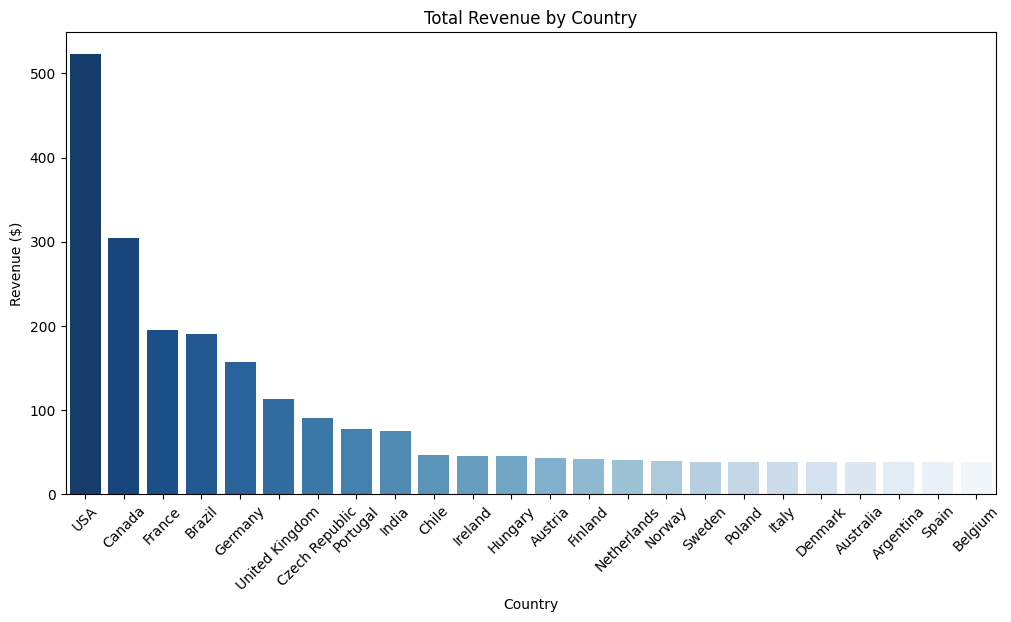

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort revenue data for better visualization
df_revenue = df_revenue.sort_values(by="TotalRevenue", ascending=False)

# Bar chart: Total revenue by country
plt.figure(figsize=(12,6))
sns.barplot(data=df_revenue, x="BillingCountry", y="TotalRevenue", palette="Blues_r")

# Rotate country labels for readability
plt.xticks(rotation=45)
plt.title("Total Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Revenue ($)")
plt.show()

**Monthly Revenue Trends**

In [4]:
query = """
SELECT strftime('%Y-%m', InvoiceDate) as Month, SUM(Total) as MonthlyRevenue
FROM Invoice
GROUP BY Month
ORDER BY Month;
"""
df_monthly = pd.read_sql(query, conn)
display(df_monthly)

,Month,MonthlyRevenue
0,2009-01,35.64
1,2009-02,37.62
2,2009-03,37.62
3,2009-04,37.62
4,2009-05,37.62
5,2009-06,37.62
6,2009-07,37.62
7,2009-08,37.62
8,2009-09,37.62
9,2009-10,37.62


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


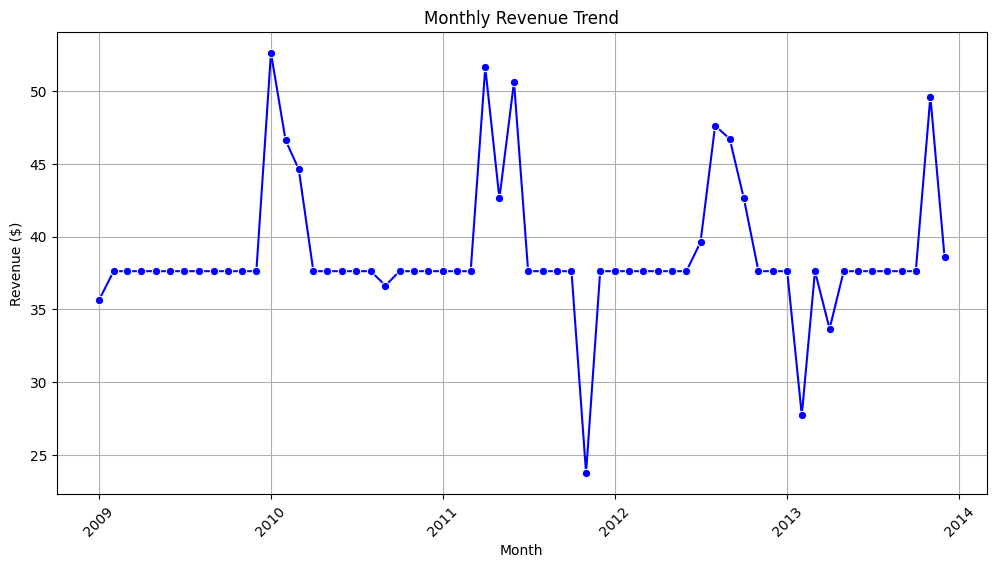

In [14]:
# Convert 'Month' to datetime for proper sorting
df_monthly["Month"] = pd.to_datetime(df_monthly["Month"])

# Line chart: Monthly revenue
plt.figure(figsize=(12,6))
sns.lineplot(data=df_monthly, x="Month", y="MonthlyRevenue", marker="o", color="blue")

# Format the chart
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Top Spending Customers**

In [5]:
query = """
SELECT c.CustomerId, c.FirstName || ' ' || c.LastName AS CustomerName, 
       COUNT(i.InvoiceId) AS PurchaseCount, 
       SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, CustomerName
ORDER BY TotalSpent DESC
LIMIT 10;
"""
df_top_customers = pd.read_sql(query, conn)
display(df_top_customers)

,CustomerId,CustomerName,PurchaseCount,TotalSpent
0,6,Helena Holý,7,49.62
1,26,Richard Cunningham,7,47.62
2,57,Luis Rojas,7,46.62
3,45,Ladislav Kovács,7,45.62
4,46,Hugh O'Reilly,7,45.62
5,28,Julia Barnett,7,43.62
6,24,Frank Ralston,7,43.62
7,37,Fynn Zimmermann,7,43.62
8,7,Astrid Gruber,7,42.62
9,25,Victor Stevens,7,42.62


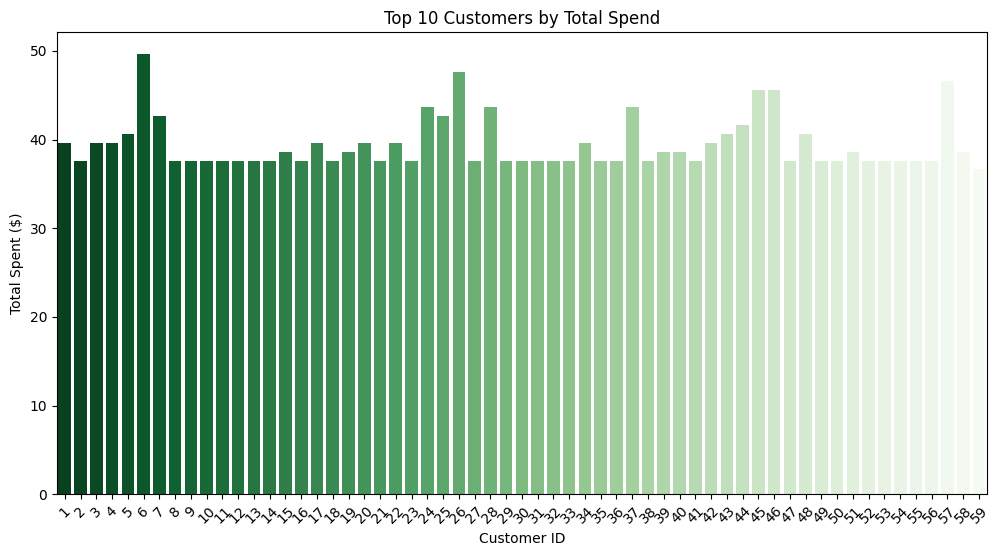

In [15]:
# Sort customers by spending
df_customers = df_customers.sort_values(by="TotalSpent", ascending=False)

# Bar chart: Top spending customers
plt.figure(figsize=(12,6))
sns.barplot(data=df_customers, x="CustomerId", y="TotalSpent", palette="Greens_r")

# Format chart
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent ($)")
plt.show()

**Revenue by Music Genre**

In [6]:
query = """
SELECT g.Name AS Genre, SUM(il.UnitPrice * il.Quantity) AS TotalRevenue
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Genre g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY TotalRevenue DESC;
"""
df_genre_revenue = pd.read_sql(query, conn)
display(df_genre_revenue)

,Genre,TotalRevenue
0,Rock,826.65
1,Latin,382.14
2,Metal,261.36
3,Alternative & Punk,241.56
4,TV Shows,93.53
5,Jazz,79.20
6,Blues,60.39
7,Drama,57.71
8,R&B/Soul,40.59
9,Classical,40.59


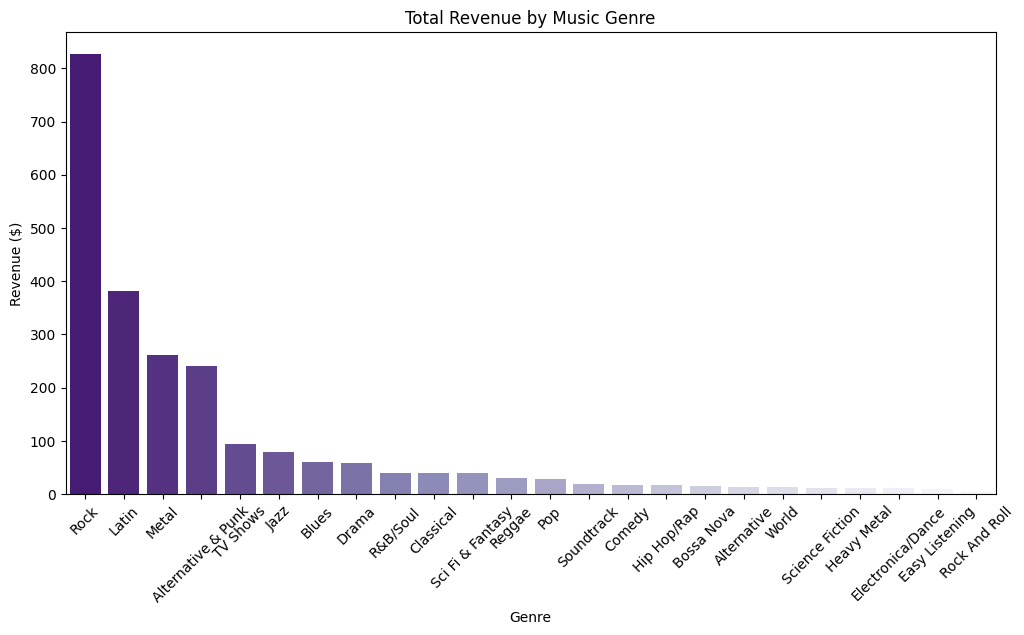

In [16]:
# Sort genre revenue for visualization
df_genre_revenue = df_genre_revenue.sort_values(by="TotalRevenue", ascending=False)

# Bar chart: Revenue by Genre
plt.figure(figsize=(12,6))
sns.barplot(data=df_genre_revenue, x="Genre", y="TotalRevenue", palette="Purples_r")

plt.xticks(rotation=45)
plt.title("Total Revenue by Music Genre")
plt.xlabel("Genre")
plt.ylabel("Revenue ($)")
plt.show()

**Most Purchased Songs**

In [7]:
query = """
SELECT t.Name AS Track, COUNT(il.InvoiceLineId) AS PurchaseCount
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
GROUP BY t.Name
ORDER BY PurchaseCount DESC
LIMIT 10;
"""
df_top_tracks = pd.read_sql(query, conn)
display(df_top_tracks)

,Track,PurchaseCount
0,The Trooper,5
1,Untitled,4
2,The Number Of The Beast,4
3,Sure Know Something,4
4,Hallowed Be Thy Name,4
5,Eruption,4
6,Where Eagles Dare,3
7,Welcome Home (Sanitarium),3
8,Sweetest Thing,3
9,Surrender,3


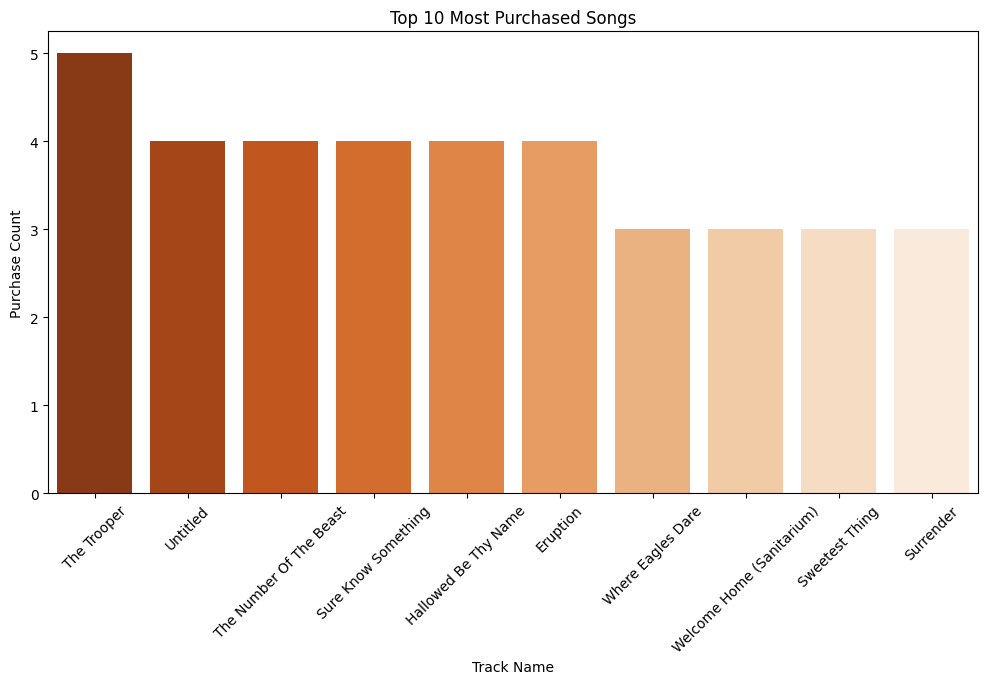

In [17]:
# Sort tracks by purchase count
df_top_tracks = df_top_tracks.sort_values(by="PurchaseCount", ascending=False)

# Bar chart: Most purchased songs
plt.figure(figsize=(12,6))
sns.barplot(data=df_top_tracks, x="Track", y="PurchaseCount", palette="Oranges_r")

plt.xticks(rotation=45)
plt.title("Top 10 Most Purchased Songs")
plt.xlabel("Track Name")
plt.ylabel("Purchase Count")
plt.show()

**Artists Generating the Most Revenue**

In [8]:
query = """
SELECT ar.Name AS Artist, SUM(il.UnitPrice * il.Quantity) AS TotalRevenue
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist ar ON al.ArtistId = ar.ArtistId
GROUP BY ar.Name
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
df_top_artists = pd.read_sql(query, conn)
display(df_top_artists)

,Artist,TotalRevenue
0,Iron Maiden,138.60
1,U2,105.93
2,Metallica,90.09
3,Led Zeppelin,86.13
4,Lost,81.59
5,The Office,49.75
6,Os Paralamas Do Sucesso,44.55
7,Deep Purple,43.56
8,Faith No More,41.58
9,Eric Clapton,39.60


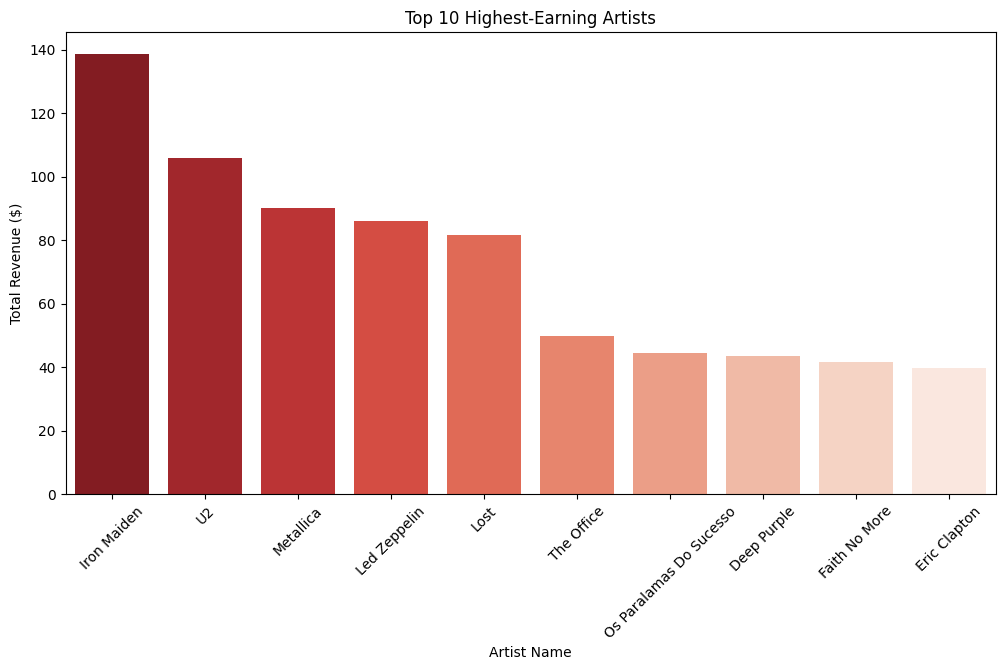

In [18]:
# Sort artist revenue
df_top_artists = df_top_artists.sort_values(by="TotalRevenue", ascending=False)

# Bar chart: Highest-earning artists
plt.figure(figsize=(12,6))
sns.barplot(data=df_top_artists, x="Artist", y="TotalRevenue", palette="Reds_r")

plt.xticks(rotation=45)
plt.title("Top 10 Highest-Earning Artists")
plt.xlabel("Artist Name")
plt.ylabel("Total Revenue ($)")
plt.show()

**Customer Revenue by Country**

In [9]:
query = """
SELECT c.CustomerId, c.FirstName || ' ' || c.LastName AS CustomerName, 
       c.Country, SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, CustomerName, c.Country
ORDER BY TotalSpent DESC
LIMIT 10;
"""
df_customer_location = pd.read_sql(query, conn)
display(df_customer_location)

,CustomerId,CustomerName,Country,TotalSpent
0,6,Helena Holý,Czech Republic,49.62
1,26,Richard Cunningham,USA,47.62
2,57,Luis Rojas,Chile,46.62
3,45,Ladislav Kovács,Hungary,45.62
4,46,Hugh O'Reilly,Ireland,45.62
5,28,Julia Barnett,USA,43.62
6,24,Frank Ralston,USA,43.62
7,37,Fynn Zimmermann,Germany,43.62
8,7,Astrid Gruber,Austria,42.62
9,25,Victor Stevens,USA,42.62


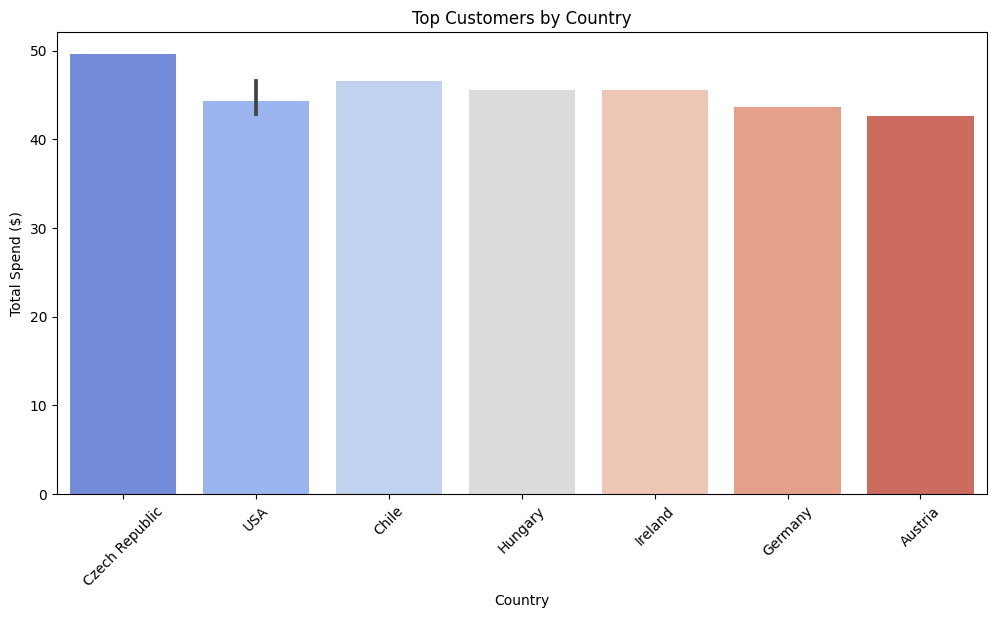

In [19]:
# Sort customer data by total spent
df_customer_location = df_customer_location.sort_values(by="TotalSpent", ascending=False)

# Bar chart: Top spending customers by country
plt.figure(figsize=(12,6))
sns.barplot(data=df_customer_location, x="Country", y="TotalSpent", palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Top Customers by Country")
plt.xlabel("Country")
plt.ylabel("Total Spend ($)")
plt.show()

**Customer Purchase Frequency**

In [10]:
query = """
SELECT CustomerId, COUNT(InvoiceId) AS PurchaseFrequency
FROM Invoice
GROUP BY CustomerId
ORDER BY PurchaseFrequency DESC
LIMIT 10;
"""
df_repeat_customers = pd.read_sql(query, conn)
display(df_repeat_customers)

,CustomerId,PurchaseFrequency
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7
